# Baseline

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

Read dataset files

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Make dataset

In [3]:
train_df.head(100)

,index,name,birth,bp_high,bp_low,chol_good,chol_bad,iron_lvl,creatinine,urine_marker,...,midsection_inch,immune_index,enzyme_1,enzyme_2,enzyme_3,vision_l,vision_r,audio_l,audio_r,health_status
0,0,Jennifer Sanders,1985,122,70,44,96,16.0,0.7,1,...,33.07,80.06,31,22,32,0.8,1.0,N,N,1
1,1,Ashley Lawrence,1985,100,64,49,80,15.0,0.9,1,...,34.65,107.22,22,22,17,1.2,1.2,N,N,1
2,2,Michael Lane,2000,130,85,34,134,16.9,0.8,1,...,29.92,123.36,24,32,41,1.2,1.2,N,N,1
3,3,Jessica Baxter,1960,119,62,73,167,13.2,0.9,1,...,34.57,95.57,21,16,14,0.7,0.2,N,N,0
4,4,Amber Woods,1960,142,93,49,108,15.5,0.7,1,...,33.46,142.27,27,40,61,0.8,0.6,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Cameron Smith,2000,110,70,43,140,16.9,0.8,1,...,39.96,62.99,33,53,22,0.8,0.8,N,N,1
96,96,William Dixon,1955,135,67,44,78,15.8,1.2,1,...,33.46,114.22,29,43,47,1.2,1.2,N,N,1
97,97,Derrick Davenport,1980,116,81,64,151,14.3,0.8,1,...,30.71,65.51,20,11,14,0.4,0.6,N,N,0
98,98,Ralph Floyd,1980,112,75,70,108,14.3,0.7,1,...,29.13,106.60,37,32,77,1.2,1.2,N,N,1


In [4]:
train_df.describe()

,index,birth,bp_high,bp_low,chol_good,chol_bad,iron_lvl,creatinine,urine_marker,sugar_lvl,...,stature_inch,mass_kg,midsection_inch,immune_index,enzyme_1,enzyme_2,enzyme_3,vision_l,vision_r,health_status
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,...,140000.000000,140000.000000,140000.000000,140000.000000,140000.00000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,69999.500000,1975.704836,122.491429,76.870964,55.857557,114.569200,14.799546,0.892755,1.073943,98.347621,...,65.069316,67.140693,32.677332,99.984363,25.52030,26.554271,36.259100,1.005829,1.000701,0.437979
std,40414.663181,11.853259,12.727214,8.988665,13.974991,28.353448,1.432162,0.177189,0.346252,15.333809,...,3.469697,12.586059,3.528640,28.861030,9.51869,18.057982,31.223283,0.403394,0.389497,0.496140
min,0.000000,1935.000000,77.000000,44.000000,18.000000,1.000000,4.900000,0.100000,1.000000,46.000000,...,53.150000,30.000000,20.080000,50.000000,6.00000,1.000000,2.000000,0.100000,0.100000,0.000000
25%,34999.750000,1965.000000,114.000000,70.000000,45.000000,95.000000,13.800000,0.800000,1.000000,90.000000,...,62.990000,60.000000,30.310000,75.000000,20.00000,16.000000,18.000000,0.800000,0.800000,0.000000
50%,69999.500000,1980.000000,121.000000,78.000000,54.000000,114.000000,15.000000,0.900000,1.000000,96.000000,...,64.960000,65.000000,32.680000,99.920000,24.00000,22.000000,27.000000,1.000000,1.000000,0.000000
75%,104999.250000,1980.000000,130.000000,82.000000,64.000000,133.000000,15.800000,1.000000,1.000000,103.000000,...,66.930000,75.000000,35.040000,124.950000,29.00000,32.000000,44.000000,1.200000,1.200000,1.000000
max,139999.000000,2000.000000,213.000000,122.000000,136.000000,1860.000000,21.000000,5.900000,6.000000,375.000000,...,74.800000,130.000000,50.000000,150.000000,778.00000,2914.000000,999.000000,9.900000,9.900000,1.000000


In [5]:
train_df.isna().sum()

index              0
name               0
birth              0
bp_high            0
bp_low             0
chol_good          0
chol_bad           0
iron_lvl           0
creatinine         0
urine_marker       0
sugar_lvl          0
lipid_lvl          0
fat_content        0
oral_issues        0
stature_inch       0
mass_kg            0
midsection_inch    0
immune_index       0
enzyme_1           0
enzyme_2           0
enzyme_3           0
vision_l           0
vision_r           0
audio_l            0
audio_r            0
health_status      0
dtype: int64

In [6]:
train_df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
139995    0
139996    0
139997    0
139998    0
139999    0
Length: 140000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


# 새로운 특성 추가
train_df['age'] = 2024 - train_df['birth']  # 나이 계산
train_df['BMI'] = train_df['mass_kg'] / (train_df['stature_inch'] * 0.0254) ** 2  # BMI 계산


#train_df['iron_lvl2'] = train_df['iron_lvl']
#train_df['iron_lvl3'] = train_df['iron_lvl']
#train_df['stature_inch_2'] = train_df['stature_inch']
#train_df['stature_inch_3'] = train_df['stature_inch']

#train_df['chol_ratio'] = train_df['chol_good'] / train_df['chol_bad']  # 콜레스테롤 비율 계산
#train_df['bp_mean'] = (train_df['bp_high'] + train_df['bp_low']) / 2
#train_df['height_weight_ratio'] = train_df['stature_inch'] / train_df['mass_kg']
#train_df['sugar_lipid_ratio'] = train_df['sugar_lvl'] / train_df['lipid_lvl']
#train_df['iron_creatinine_ratio'] = train_df['iron_lvl'] / train_df['creatinine']


# train_df['urine_marker_chol_bad'] = train_df['urine_marker'] * train_df['chol_bad']
# train_df['immune_mass_ratio'] = train_df['immune_index'] / train_df['mass_kg']


#train_df['immune_age_ratio'] = train_df['immune_index'] / train_df['age']
# train_df['urine_marker_bp_high'] = train_df['urine_marker'] * train_df['bp_high']
# train_df['oral_issues_chol_bad'] = train_df['oral_issues'] * train_df['chol_bad']
# train_df['oral_issues_bp_high'] = train_df['oral_issues'] * train_df['bp_high']


#train_df['waist_height_ratio'] = train_df['midsection_inch'] / train_df['stature_inch']


test_df['age'] = 2024 - test_df['birth']
test_df['BMI'] = test_df['mass_kg'] / (test_df['stature_inch'] * 0.0254) ** 2

#test_df['iron_lvl2'] = test_df['iron_lvl']
#test_df['iron_lvl3'] = test_df['iron_lvl']
#test_df['stature_inch_2'] = test_df['stature_inch']
#test_df['stature_inch_3'] = test_df['stature_inch']

#test_df['chol_ratio'] = test_df['chol_good'] / test_df['chol_bad'] 
#test_df['bp_mean'] = (test_df['bp_high'] + test_df['bp_low']) / 2
#test_df['height_weight_ratio'] = test_df['stature_inch'] / test_df['mass_kg']
#test_df['sugar_lipid_ratio'] = test_df['sugar_lvl'] / test_df['lipid_lvl']
#test_df['iron_creatinine_ratio'] = test_df['iron_lvl'] / test_df['creatinine']


# test_df['urine_marker_chol_bad'] = test_df['urine_marker'] * test_df['chol_bad']
# test_df['immune_mass_ratio'] = test_df['immune_index'] / test_df['mass_kg']


#test_df['immune_age_ratio'] = test_df['immune_index'] / test_df['age']
# test_df['urine_marker_bp_high'] = test_df['urine_marker'] * test_df['bp_high']
# test_df['oral_issues_chol_bad'] = test_df['oral_issues'] * test_df['chol_bad']
# test_df['oral_issues_bp_high'] = test_df['oral_issues'] * test_df['bp_high']



#test_df['waist_height_ratio'] = test_df['midsection_inch'] / test_df['stature_inch']
# 타겟 변수와 특징 변수 분리


#X = train_df.drop(columns=['health_status','birth', 'name', 'index', 'audio_l', 'audio_r', 'urine_marker','stature_inch','mass_kg','midsection_inch','bp_high','bp_low','chol_good','chol_bad'])
X_train = train_df.drop(columns=['health_status', 'name', 'index', 'audio_l', 'audio_r','urine_marker','enzyme_1']) # ,'chol_bad','immune_index','mass_kg'
y_train = train_df['health_status']
# # 스케일링
# scaler = StandardScaler()
# X = scaler.fit_transform(X)  # 전체 데이터에 스케일링 적용


#test_df = test_df.drop(columns=['birth','name', 'index', 'audio_l', 'audio_r','urine_marker','stature_inch','mass_kg','midsection_inch','bp_high','bp_low','chol_good','chol_bad']) # ,'oral_issues'
test_df = test_df.drop(columns=['name', 'index', 'audio_l', 'audio_r','urine_marker','enzyme_1'])#  # ,'chol_bad','immune_index','mass_kg'
# test_df = scaler.transform(test_df)


# 데이터셋 나누기 (70% 훈련 데이터, 30% 테스트 데이터)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

# 데이터 크기 확인
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_valid.shape, y_valid.shape)


훈련 데이터 크기: (126000, 21) (126000,)
테스트 데이터 크기: (14000, 21) (14000,)


In [ ]:
print("Train Data Features:", X.columns)
print("Test Data Features:", test_df.columns)
#test_df = test_df[X.columns]

Train Data Features: Index(['birth', 'bp_high', 'bp_low', 'chol_good', 'iron_lvl', 'creatinine',
       'sugar_lvl', 'lipid_lvl', 'fat_content', 'oral_issues', 'stature_inch',
       'midsection_inch', 'enzyme_1', 'enzyme_2', 'enzyme_3', 'vision_l',
       'vision_r', 'age', 'chol_ratio', 'BMI', 'height_weight_ratio',
       'bp_mean', 'sugar_lipid_ratio', 'iron_creatinine_ratio',
       'urine_marker_chol_bad', 'immune_mass_ratio'],
      dtype='object')
Test Data Features: Index(['birth', 'bp_high', 'bp_low', 'chol_good', 'iron_lvl', 'creatinine',
       'sugar_lvl', 'lipid_lvl', 'fat_content', 'oral_issues', 'stature_inch',
       'midsection_inch', 'enzyme_1', 'enzyme_2', 'enzyme_3', 'vision_l',
       'vision_r', 'age', 'chol_ratio', 'BMI'],
      dtype='object')


In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # SMOTE 적용 전 클래스 분포 확인
# print("Original class distribution:", Counter(y_train))

# # SMOTE 적용
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

# # SMOTE 적용 후 클래스 분포 확인
# print("Resampled class distribution:", Counter(y_train))

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# from sklearn.preprocessing import MinMaxScaler

# # MinMaxScaler 초기화
# scaler = MinMaxScaler(copy=False)

# # 학습 데이터에 스케일러 학습(fit) 및 변환(transform)
# X_train = scaler.fit_transform(X_train)

# # 테스트 데이터에 동일한 스케일러로 변환(transform)
# X_test = scaler.transform(X_test)





from sklearn.preprocessing import RobustScaler

# RobustScaler 초기화
scaler = RobustScaler(copy=False)

# 학습 데이터에 스케일러 학습(fit) 및 변환(transform)
X_train = scaler.fit_transform(X_train)

# # 테스트 데이터에 동일한 스케일러로 변환(transform)
X_valid = scaler.transform(X_valid)

# 찐 테스트 데이터에 동일한 스케일러로 변환(transform)
test_df = scaler.transform(test_df)



In [ ]:
# # PCA 적용 코드
# from sklearn.decomposition import PCA

# print(f"Original feature size: {X_train.shape[1]}")

# # 2. PCA 적용 (95% 분산 기준으로 주성분 개수 선택)
# pca = PCA(n_components=0.90)  # 95% 분산을 설명하는 주성분 개수 자동 선택
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# test_df = pca.transform(test_df)
# print(f"Reduced feature size (PCA): {X_train.shape[1]}")
# # 누적 분산 비율 계산
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative Explained Variance Ratio:", cumulative_variance)
# import numpy as np

# # PCA 결과에서 누적 분산 비율 가져오기
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# # 95%를 넘는 주성분 개수 계산
# n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
# print(f"Number of components explaining 95% variance: {n_components_99}")
# # 그래프로 시각화
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA: Explained Variance vs. Number of Components')
# plt.legend()
# plt.grid()
# plt.show()

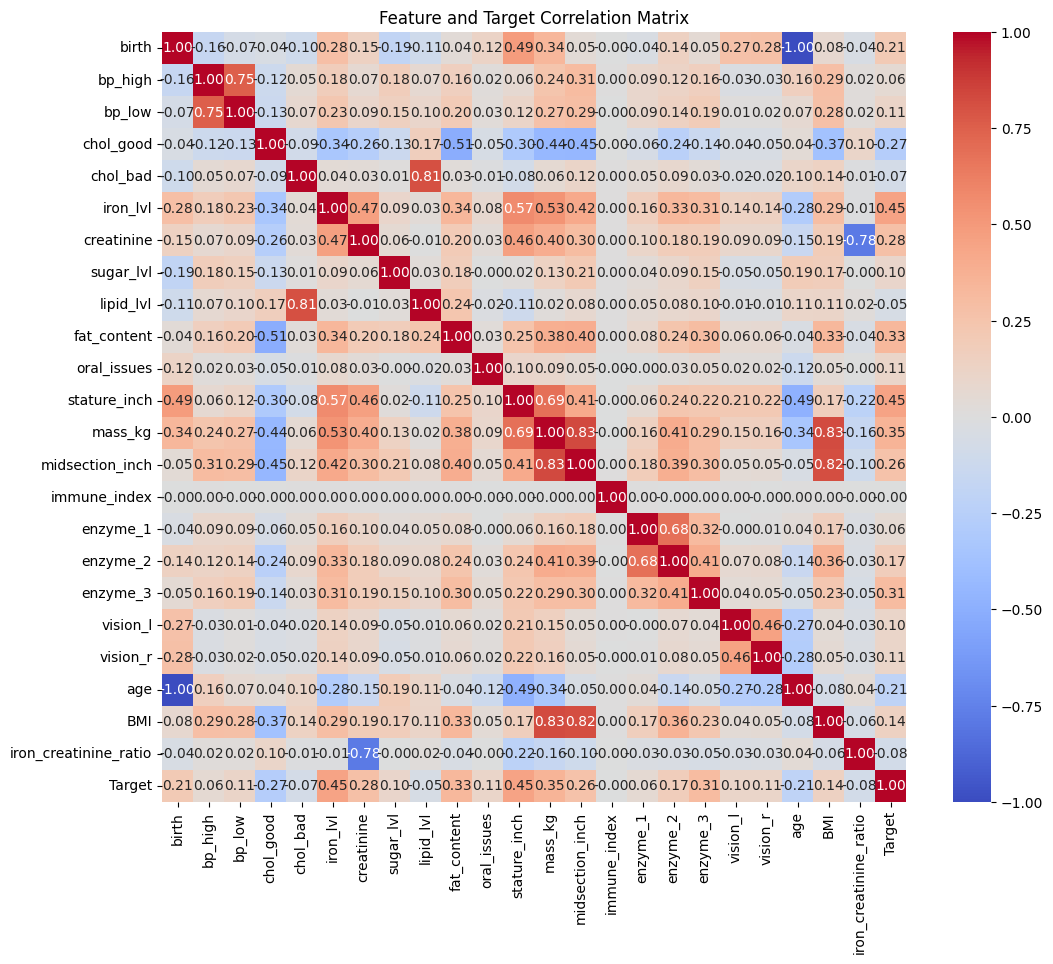

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 상관관계 계산
# correlation_matrix = X.corr()

# # 상관계수 히트맵 시각화
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
# plt.title("Feature Correlation Matrix")
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# X와 타겟 변수 합치기
X_with_target = X_train.copy()
X_with_target['Target'] = y

# 상관관계 계산
correlation_matrix = X_with_target.corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature and Target Correlation Matrix")
plt.show()


In [ ]:
# # 주의: one-hot encoding을 하는 경우 train과 test에 동일하게 적용되어야 함
# X = pd.concat([X_train, X_test], axis=0)
# X = pd.get_dummies(X)

# X_train = X.iloc[:len(X_train)]
# X_test = X.iloc[len(X_train):]

Make model & train

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install optuna lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 기본
# F1 SCORE: 0.767304
# 테스트 데이터 AUC 점수: 0.870299

# enzyme1 효소 드랍 취소시 (f1 성능 하락, auc 상승)
#'urine_marker' 효소 드랍 취소시 F1 SCORE: 0.768435 테스트 데이터 AUC 점수: 0.869548(f1 0.1 상승, auc 0.5하락)
# immune_index 드랍시 F1 SCORE: 0.769966테스트 데이터 AUC 점수: 0.870491 모두 상승!
# oral issue pid lvl, sugar_lvl hol bad (둘다 성능 감소)
# 스케일링 미적용, n_estimators 1000기준 85765
# n_estimators 1100일때 F1 SCORE: 0.770703 테스트 데이터 AUC 점수: 0.870683 
# n_estimators 1200 기준 F1 SCORE: 0.770833 테스트 데이터 AUC 점수: 0.87084 ,learning_rate =0.1 >> 'submission_lgbm_12_10(3).csv' 성능 85810 , train test 비율을 7:3으로 바꾸니 0.770089, 0.869784로 성능 감소

# n_estimators 1100 기준 F1 SCORE: 0.771287 테스트 데이터 AUC 점수: 0.871156
# n_estimators 1125 기준 F1 SCORE: 0.77121 테스트 데이터 AUC 점수: 0.871175
# n_estimators 1140 기준 F1 SCORE: 0.771286테스트 데이터 AUC 점수: 0.871258
# n_estimators 1150 기준 F1 SCORE: 0.771458 테스트 데이터 AUC 점수: 0.871267, learning_rate =0.1 , train test 비율을 8:2
# n_estimators 1160 기준 F1 SCORE: 0.771447 테스트 데이터 AUC 점수: 0.871277
# n_estimators 1175 기준 F1 SCORE: 0.771381 테스트 데이터 AUC 점수: 0.87131
# n_estimators 1200 기준 F1 SCORE: 0.771309 테스트 데이터 AUC 점수: 0.871433, learning_rate =0.1 , train test 비율을 8:2
# n_estimators 1250 F1 SCORE: 0.771179 테스트 데이터 AUC 점수: 0.87143, learning_rate =0.1 , train test 비율을 8:2




# n_estimators 1160 기준 F1 SCORE: 0.770128 테스트 데이터 AUC 점수: 0.871179 train test 비율을 8.25:1.75
# n_estimators 1160 기준 F1 SCORE: 0.772356 테스트 데이터 AUC 점수: 0.872547, train test 비율을 8.5:1.5 >>> 'submission_lgbm_12_11(1).csv'
# n_estimators 1160 기준 F1 SCORE: 0.771636 테스트 데이터 AUC 점수: 0.872378 , train test 비율을 8.75:1.25

# 여기서 learning_rate 조정한다면 ? 

#learning_rate 0.01 기준, 9:1
# F1 SCORE: 0.767289 테스트 데이터 AUC 점수: 0.866652 n_estimators가 3000
# F1 SCORE: 0.768759 테스트 데이터 AUC 점수: 0.867704 n_estimators가 4000
# F1 SCORE: 0.768652 테스트 데이터 AUC 점수: 0.867947 n_estimators가 4250
# F1 SCORE: 0.769313 테스트 데이터 AUC 점수: 0.868186 n_estimators가 4500
# F1 SCORE: 0.768911 테스트 데이터 AUC 점수: 0.868386 n_estimators가 4750
# F1 SCORE: 0.769231 테스트 데이터 AUC 점수: 0.868585 n_estimators가 5000
# F1 SCORE: 0.769018 테스트 데이터 AUC 점수: 0.868946 n_estimators가 5500
# F1 SCORE: 0.768603 테스트 데이터 AUC 점수: 0.869178 n_estimators가 6000
# F1 SCORE: 0.768484 테스트 데이터 AUC 점수: 0.869586 n_estimators가 7000
# F1 SCORE: 0.768993 테스트 데이터 AUC 점수: 0.870576 n_estimators가 10000
# F1 SCORE: 0.76798 테스트 데이터 AUC 점수: 0.870895 n_estimators 가 12000
# F1 SCORE: 0.768504 테스트 데이터 AUC 점수: 0.871259 n_estimators 가 15000


# F1 SCORE: 0.770524 테스트 데이터 AUC 점수: 0.870088 n_estimators가 4500,learning_rate=0.01, train test 비율을 8.5:1.5 >>> 'submission_lgbm_12_11(2).csv'
# F1 SCORE: 0.770611 테스트 데이터 AUC 점수: 0.870266 n_estimators가 4700,learning_rate=0.01, train test 비율을 8.5:1.5
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, classification_report
from lightgbm import LGBMClassifier


import numpy as np
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
# # 스케일링
# scaler = StandardScaler()
# X = scaler.fit_transform(X)  # 전체 데이터에 스케일링 적용

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')




# 새로운 특성 추가
train_df['age'] = 2024 - train_df['birth']  # 나이 계산
train_df['BMI'] = train_df['mass_kg'] / (train_df['stature_inch'] * 0.0254) ** 2  # BMI 계산
train_df['audio_r'] = train_df['audio_r'].map({'NORMAL': 0, 'ABNORMAL': 1})


test_df['age'] = 2024 - test_df['birth']
test_df['BMI'] = test_df['mass_kg'] / (test_df['stature_inch'] * 0.0254) ** 2
test_df['audio_r'] = test_df['audio_r'].map({'NORMAL': 0, 'ABNORMAL': 1})
test_df = test_df.drop(columns=['name', 'index', 'audio_l','urine_marker','enzyme_1','immune_index']) # ,'chol_bad','immune_index','mass_kg'

X_train = train_df.drop(columns=['health_status', 'name', 'index', 'audio_l','urine_marker','enzyme_1','immune_index']) # ,'chol_bad','immune_index','mass_kg'
y_train = train_df['health_status']

# 데이터셋 나누기 (85% 훈련 데이터, 25% 테스트 데이터)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)



# 데이터 크기 확인
print("훈련 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_valid.shape, y_valid.shape)


# 1160 기준 스케일링 적용시, 미적용시 적용시 :F1 SCORE: 0.760784 테스트 데이터 AUC 점수: 0.860687




from sklearn.preprocessing import RobustScaler

# RobustScaler 초기화
scaler = RobustScaler(copy=False)

# 학습 데이터에 스케일러 학습(fit) 및 변환(transform)
X_train = scaler.fit_transform(X_train)

# # 테스트 데이터에 동일한 스케일러로 변환(transform)
X_valid = scaler.transform(X_valid)

# 찐 테스트 데이터에 동일한 스케일러로 변환(transform)
test_df = scaler.transform(test_df)



# 1. 모델 구조 파라미터: max_depth → num_leaves
# 2. 샘플링 관련 파라미터: subsample → colsample_bytree
# 3. 정규화 파라미터: reg_alpha → reg_lambda → min_gain_to_split
# 4. 리프 노드 관련 파라미터: min_child_samples → min_data_in_leaf
# 5. 추가 조정: bagging_freq


# 최적의 하이퍼파라미터: {'max_depth': 7, 'n_estimators': 1000} >> 7이기에 6.5에서 7.5 사이로
# F1 SCORE: 0.766223
# 테스트 데이터 AUC 점수: 0.86796
# max_depth 는 -1일떄가 대체적으로 성능이 좋음

# 실제 test 데이터 입력시 0.85165

# # LightGBM 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [1160],#[4685,4690,4695,4700,4705,4710,4715],
    'max_depth': [7],
    'num_leaves': [45],  # 2^(max_depth)에 적합한 리프 노드 수 >>45개로 판명 (44~46)
    'subsample': [0.1],  # max_samples에 해당 > (0.1, 0.05~0.15)
    'colsample_bytree': [0.4],  # max_features에 해당 >0.4(0.35~0.45)
    'min_data_in_leaf' :[700], #675~725 ,#'min_child_samples' 와 같은거 
    'reg_alpha' :[0.7], # 0.65~0.75
    'reg_lambda' :[0.1], #0.05~0.15
    'min_gain_to_split':[0],
    'bagging_freq':[0],
    'max_bin' : [360], # 다른 하이퍼파라미터 최적으로 다 찾고 적정 max_bin 찾아도 됨 405임,
    'learning_rate': [0.01]
}

#'learning_rate': [0.05],  # 학습률 차후 조정


# LightGBM 모델 초기화
lgbm_model = LGBMClassifier(
    boosting_type='dart',
    objective='binary',  # 이진 분류 문제로 설정
    random_state=42,
    n_jobs=-1
)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,  # 교차 검증 folds
    verbose=2,
    n_jobs=-1
)

# GridSearchCV로 학습
grid_search.fit(X_train, y_train)

# 최적 모델로 테스트 데이터 평가
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_valid)
y_pred_proba = best_model.predict_proba(X_valid)[:, 1]

# 최적의 하이퍼파라미터 및 결과 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# F1-Score 계산
f1 = f1_score(y_valid, y_pred)
print("F1 SCORE:", round(f1, 6))

# ROC-AUC 계산
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
auc_score = roc_auc_score(y_valid, y_pred_proba)
print("테스트 데이터 AUC 점수:", round(auc_score, 6))


훈련 데이터 크기: (126000, 21) (126000,)
테스트 데이터 크기: (14000, 21) (14000,)
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\user\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
c:\Users\user\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 55185, number of negative: 70815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

In [ ]:
# # 최적의 파라미터 추출
# best_params = study.best_params

# # 최적의 파라미터로 모델 생성
# best_model = LGBMClassifier(
#     **best_params,
#     random_state=42  # 일관성을 위해 추가
# )

# # # Train/Validation 데이터를 합쳐 최종 학습 데이터 생성
# X_train_full = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_valid)])
# y_train_full = pd.concat([pd.Series(y_train), pd.Series(y_valid)])
# >> 이거 안하기. 왜냐하면 과적합 가능성 증가


# 최종 모델 학습
grid_search.fit(
    X_train, y_train,
    eval_metric="logloss",
)




Fitting 5 folds for each of 3 candidates, totalling 15 fits


            Feature  Importance
18          audio_r           0
10      oral_issues         659
17         vision_r         787
16         vision_l         977
12          mass_kg        1053
19              age        1661
11     stature_inch        1767
2            bp_low        1889
1           bp_high        1906
13  midsection_inch        1924
3         chol_good        2051
6        creatinine        2091
7         sugar_lvl        2122
20              BMI        2240
8         lipid_lvl        2282
0             birth        2491
14         enzyme_2        2780
4          chol_bad        3026
5          iron_lvl        3108
15         enzyme_3        3718
9       fat_content        3881


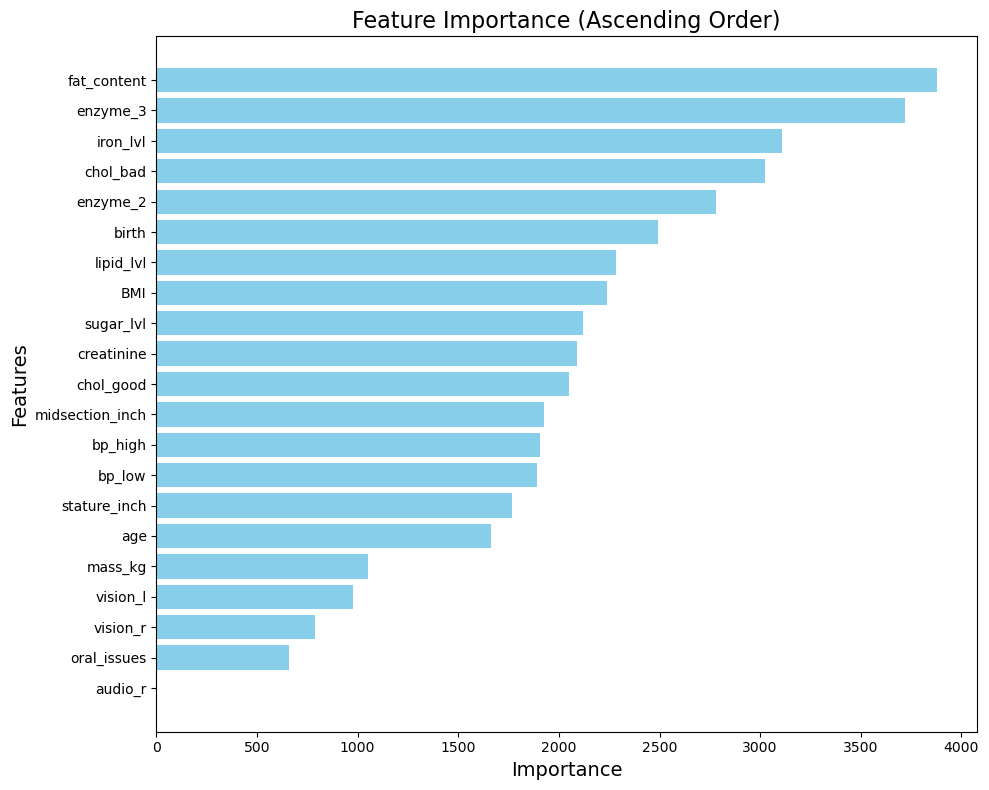

In [18]:
import pandas as pd
import numpy as np

# Feature importance 가져오기
feature_importances = best_model.feature_importances_

# Feature 이름과 중요도를 데이터프레임으로 변환
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 중요도를 기준으로 오름차순 정렬
features_sorted = features_df.sort_values(by='Importance', ascending=True)

# 결과 출력
print(features_sorted)

# 그래프로 시각화 (선택 사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(features_sorted['Feature'], features_sorted['Importance'], color='skyblue')
plt.title('Feature Importance (Ascending Order)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


방법 3: Permutation Importance (교환 중요도)
Permutation Importance는 feature의 값을 랜덤하게 섞어 해당 feature가 모델 성능에 얼마나 중요한지를 평가합니다. 중요도가 낮은 feature는 삭제할 후보가 됩니다.

단계
1. 학습된 모델에서 특정 feature를 랜덤하게 섞음.
2. 섞기 전후의 모델 성능 차이를 비교.

In [17]:
from sklearn.inspection import permutation_importance


# Permutation Importance 계산
perm_importance = permutation_importance(best_model, X_valid, y_valid, scoring='f1')

# 중요도 정렬
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df)


[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsampl

Make test prediction

In [13]:
# positive일 확률을 저장
test_prob = best_model.predict_proba(test_df)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=700
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


Export prediction to file

In [14]:
# 제출 파일 저장
submission_df = pd.read_csv('sample_submission.csv')
submission_df.health_status = test_prob
submission_df.to_csv('submission_lgbm_12_17(2).csv', index=False)